In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import math
import requests
import io
from scipy import integrate, optimize
from sklearn.linear_model import LinearRegression
#from shapely.geometry import Point, Polygon
from sklearn.pipeline import Pipeline
from IPython.display import display, Math, Latex

%matplotlib inline


In [3]:
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
confirmed = pd.read_csv(url1, error_bad_lines=False)
deaths = pd.read_csv(url2, error_bad_lines=False)
recovered = pd.read_csv(url3, error_bad_lines=False)

In [4]:
confirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,273,281,299,349,367,423,444,484,521,555
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,277,304,333,361,377,383,400,409,416,433
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,986,1171,1251,1320,1423,1468,1572,1666,1761,1825
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,428,439,466,501,525,545,564,583,601,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,10,14,16,17,19,19,19,19
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,9,15,15,15,15,19,19,19,19,21
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,663,736,770,822,833,853,881,921,937,967
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,87,91,93,96,96,96,99,100,103,103
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2298,2389,2493,2580,2637,2686,2734,2773,2822,2857


In [5]:
confirmed[~confirmed['Province/State'].isnull()]['Country/Region'].value_counts()

China             33
Canada            15
France            10
United Kingdom    10
Australia          8
Netherlands        4
Denmark            2
Name: Country/Region, dtype: int64

In [6]:
confirmed=confirmed[confirmed['Country/Region']=='US']
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,243762,275586,308853,337072,366667,396223,429052,461437,496535,526396


In [7]:
confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [8]:
deaths=deaths[deaths['Country/Region']=='US']
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,5926,7087,8407,9619,10783,12722,14695,16478,18586,20463


In [9]:
recovered=recovered[recovered['Country/Region']=='US']
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,9001,9707,14652,17448,19581,21763,23559,25410,28790,31270


In [10]:
combined=pd.merge(confirmed, deaths, on=list(confirmed.columns), how='outer')
combined

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,243762,275586,308853,337072,366667,396223,429052,461437,496535,526396
1,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,5926,7087,8407,9619,10783,12722,14695,16478,18586,20463


In [11]:
combined=pd.merge(confirmed, deaths, on=list(confirmed.columns), how='outer')
combined

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,243762,275586,308853,337072,366667,396223,429052,461437,496535,526396
1,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,5926,7087,8407,9619,10783,12722,14695,16478,18586,20463


In [12]:
combined=pd.merge(combined, recovered, on=list(confirmed.columns), how='outer')
combined

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,243762,275586,308853,337072,366667,396223,429052,461437,496535,526396
1,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,5926,7087,8407,9619,10783,12722,14695,16478,18586,20463
2,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,9001,9707,14652,17448,19581,21763,23559,25410,28790,31270


In [13]:
#combined_IL.index=['Confirmed', 'Deaths', 'Recovered']

In [14]:
combined

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,243762,275586,308853,337072,366667,396223,429052,461437,496535,526396
1,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,5926,7087,8407,9619,10783,12722,14695,16478,18586,20463
2,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,9001,9707,14652,17448,19581,21763,23559,25410,28790,31270


In [15]:
new=combined


In [16]:
new=new.drop(['Province/State','Country/Region','Lat','Long'], axis=1)

In [17]:
#dropping january and feburary testing was not fully done here
new=new.drop(['1/22/20', '1/23/20','1/24/20', '1/25/20', '1/26/20', 
              '1/27/20', '1/28/20', '1/29/20','1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', 
              '2/4/20', '2/5/20','2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20','2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20','2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20','3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20'], axis=1)

In [18]:
new.index=['Confirmed', 'Deaths', 'Recovered']

In [19]:
new=new.T

In [20]:
new['day_count'] = list(range(1,len(new)+1))

In [21]:
new

,Confirmed,Deaths,Recovered,day_count
3/10/20,959,28,8,1
3/11/20,1281,36,8,2
3/12/20,1663,40,12,3
3/13/20,2179,47,12,4
3/14/20,2727,54,12,5
3/15/20,3499,63,12,6
3/16/20,4632,85,17,7
3/17/20,6421,108,17,8
3/18/20,7783,118,105,9
3/19/20,13747,200,121,10


(0, 40)

(0, 600000)

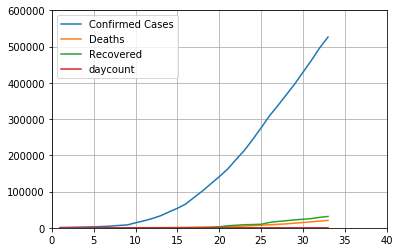

In [22]:
plt.plot(new.day_count,new)
plt.legend(['Confirmed Cases', 'Deaths', 'Recovered', 'daycount'])
#plt.title("SEIR model  COVID-19")
#plt.xlabel('time(days)')
#plt.ylabel('population')
plt.grid()
plt.xlim([0,40])
plt.ylim([0,600000])
plt.show()

# SEIR model
The differential equations of SEIR model are following:

In [23]:
display(Math(r'\frac{d G}{d t} =  \Lambda - \beta_1 \frac{N}{O}G - \mu G \\ \frac{d S}{d t} = \beta_1 \frac{N}{O}G -\frac{(E+kC)}{N} S -\mu S\\     \frac{d E}{d t} = \beta_2 \frac{(E+kC)}{N} S- \gamma E -\mu E \\ \frac{d C}{d t} = \gamma E -\theta_C C -\phi C \\ \frac{d R}{d t} = \theta_C C -\mu R \\ N=S+E+C+R\\O=G+N'))


<IPython.core.display.Math object>

Here is a modified S,E,I,R model where G represents General population of United States of America, S represents the succeptible area of the United States, E is the exposed hidden population infected by the virus, C is the confirmed cases and R is the Recovered cases


β  is the infectious rate( 0 ≤ β ≤ 1 ),  γ  is the rate at which an exposed person becomes infective and  𝜃𝐶 is the recovery rate and 𝜇𝐶 is the death rate.



In [24]:
ydata = [i for i in new.Confirmed.values]
xdata = new.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)


In [25]:
ydata

array([   959.,   1281.,   1663.,   2179.,   2727.,   3499.,   4632.,
         6421.,   7783.,  13747.,  19273.,  25600.,  33276.,  43847.,
        53740.,  65778.,  83836., 101657., 121465., 140909., 161831.,
       188172., 213372., 243762., 275586., 308853., 337072., 366667.,
       396223., 429052., 461437., 496535., 526396.])

In [112]:
O = 330511531 #estimated populatin of united states
N = 90000000 #79834735 #estimated population of hot covid areas
C0 = ydata[0] #Confirmed or #infected
G0 = 0
S0 = O - C0 #Succeptible
E0 = 0 #Exposed
C0 = ydata[0] #Confirmed
R0 = 0 #Recovered
init_state = [G0, S0, E0, C0, R0]
Lambda = 379712/365 # in 2018 3,791,712 births were reported in US
beta1 = 0.3
beta2 = .2
mu =  .03 # in 2018  2,813,503  deaths were reported in US https://www.cdc.gov/nchs/data/nvsr/nvsr68/nvsr68_09-508.pdf
thetaC = .61  # recovery rate
phi = .8 #death rate of people dying from covid-19
gamma = 1.9 #constant
k=1


In [113]:
# Define differential equation of modified SEIR model

'''
dG/dt = Lambda - G*(beta1*N)/O + mu*G
dS/dt = (beta1*G*N)/O - (beta2*S*(E+k*C))/N + mu*S
dE/dt = (beta2*S*(E+k*C))/N - gamma*E-mu*E
dC/dt = gamma*E - thetaC*C-phi*C
dR/dt = thetaC*C - mu*R

G = v[0] 
S = v[1] 
E = v[2] 
C = v[3] 
R = v[4]

dv[0]/dt = Lambda - v[0]*(beta1*N)/O + mu*v[0]
dv[1]/dt = (beta1*v[0]*N)/O - (beta2*v[1]*(v[2]+k*v[3]))/N + mu*v[1]
dv[2]/dt = (beta2*v[1]*(v[2]+k*v[3]))/N - gamma*v[2]-mu*v[2]
dv[3]/dt = gamma*v[2] - thetaC*v[3]-phi*v[3] 
dv[4]/dt = thetaC*v[3] - mu*v[4]

N = S + E + C + R
O = G + N
'''

def m_model(v, x, Lamda, beta1, beta2, thetaC, mu, phi, k, gamma, N, O):
    return [Lambda - v[0]*(beta1*N)/O + mu*v[0], (beta1*v[0]*N)/O - (beta2*v[1]*(v[2]+k*v[3]))/N + mu*v[1],
            (beta2*v[1]*(v[2]+k*v[3]))/N - gamma*v[2]-mu*v[2],gamma*v[2] - thetaC*v[3]-phi*v[3], thetaC*v[3] - mu*v[4] ]


def fit_odeint(x, epsilon):
    return integrate.odeint(m_model, init_state, x, args=(Lambda, beta1, beta2, thetaC, mu, phi, k, gamma, N, O))[:,4]

'\ndG/dt = Lambda - G*(beta1*N)/O + mu*G\ndS/dt = (beta1*G*N)/O - (beta2*S*(E+k*C))/N + mu*S\ndE/dt = (beta2*S*(E+k*C))/N - gamma*E-mu*E\ndC/dt = gamma*E - thetaC*C-phi*C\ndR/dt = thetaC*C - mu*R\n\nG = v[0] \nS = v[1] \nE = v[2] \nC = v[3] \nR = v[4]\n\ndv[0]/dt = Lambda - v[0]*(beta1*N)/O + mu*v[0]\ndv[1]/dt = (beta1*v[0]*N)/O - (beta2*v[1]*(v[2]+k*v[3]))/N + mu*v[1]\ndv[2]/dt = (beta2*v[1]*(v[2]+k*v[3]))/N - gamma*v[2]-mu*v[2]\ndv[3]/dt = gamma*v[2] - thetaC*v[3]-phi*v[3] \ndv[4]/dt = thetaC*v[3] - mu*v[4]\n\nN = S + E + C + R\nO = G + N\n'

In [114]:
#integrate.odeint(m_model, init_state, xdata, args=(Lambda, beta1, beta2, thetaC, mu, phi, k, gamma, N, O))

In [115]:
xdata

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33.])

In [116]:
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

In [117]:
inf_period = 1.0/gamma
lat_period = 1.0/popt[0]
print("Optimal parameters: gamma =", gamma, ", epsilon = ", popt[0], "\ninfectious period(day) = ", inf_period, ", latency period(day) = ", lat_period)

Optimal parameters: gamma = 1.9 , epsilon =  1.0 
infectious period(day) =  0.5263157894736842 , latency period(day) =  1.0


Text(0.5, 1.0, 'Fit of modified SEIR model to United States infected cases')

Text(0, 0.5, 'Population infected')

Text(0.5, 0, 'Days')

(0, 40)

(0, 600000)

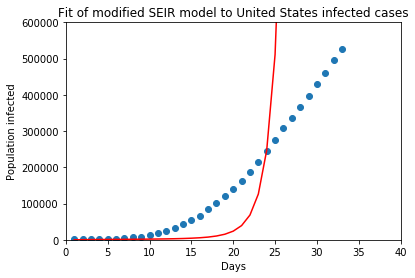

In [118]:
plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted, 'r')
plt.title("Fit of modified SEIR model to United States infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.xlim([0,40])
plt.ylim([0,600000])
plt.show()

# Numerical Integreation

In [119]:
# parameters
t_max = 100 #days
dt = 1

O = 330511531 #estimated populatin of united states
N = 79834735 #estimated population of hot covid areas
C0 = ydata[0] #Confirmed or #infected
G0 = 0
S0 = O - C0 #Succeptible
E0 = 0 #Exposed
C0 = ydata[0] #Confirmed
#R0 = 0 #Recovered
#init_state = [G0, S0, E0, C0, R0]
#Lambda = 379712/365 # in 2018 3,791,712 births were reported in US
#beta1 = 1
#beta2 = 1
#mu =  0.4  # in 2018  2,813,503  deaths were reported in US https://www.cdc.gov/nchs/data/nvsr/nvsr68/nvsr68_09-508.pdf
#thetaC = 0.5  # recovery rate
#phi = 0.1  #death rate of people dying from covid-19
#gamma = 0.76 #constant
#k=1.0


Text(0.5, 1.0, 'SEIR model  COVID-19')

Text(0.5, 0, 'time(days)')

Text(0, 0.5, 'population')

(0, 80)

(0, 330511531)

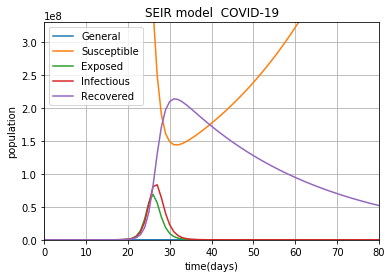

In [120]:
# numerical integration
times = np.arange(0, t_max, dt)
args = (Lambda, beta1, beta2, thetaC, mu, phi, k, gamma, N, O)

# Numerical Solution using scipy.integrate
# Solver SEIR model
result = integrate.odeint(m_model, init_state, times, args)
# plot
plt.plot(times, result)
plt.legend(['General','Susceptible', 'Exposed', 'Infectious', 'Recovered'])
plt.title("SEIR model  COVID-19")
plt.xlabel('time(days)')
plt.ylabel('population')
plt.grid()
plt.xlim([0,80])
plt.ylim([0,330511531])
plt.show()

In [512]:
result_df = pd.DataFrame(data=result, columns=['General','Susceptible', 'Exposed', 'Infectious', 'Recovered'])
result_df.shape

(100, 5)

In [513]:
result_df

,General,Susceptible,Exposed,Infectious,Recovered
0,0.000000e+00,3.305106e+08,0.000000e+00,9.590000e+02,0.000000e+00
1,1.082626e+03,4.036819e+08,2.905821e+03,9.800171e+02,4.620517e+02
2,2.254514e+03,4.930149e+08,2.941233e+04,7.802744e+03,2.404615e+03
3,3.523021e+03,6.013700e+08,5.634779e+05,1.275345e+05,2.885636e+04
4,4.896115e+03,7.037079e+08,2.253067e+07,4.429086e+06,7.914409e+05
5,6.382418e+03,2.197028e+08,3.883698e+08,1.236968e+08,2.916556e+07
6,7.991265e+03,1.205803e+07,1.948915e+08,1.742583e+08,1.363679e+08
7,9.732758e+03,3.261419e+06,5.750262e+07,8.243206e+07,1.914647e+08
8,1.161783e+04,2.339955e+06,1.636729e+07,2.961045e+07,1.893668e+08
9,1.365833e+04,2.412825e+06,4.656812e+06,9.545891e+06,1.661439e+08


In [514]:
lr = LinearRegression()
X_train = new[['Confirmed']].values
Y_train = new[['Deaths']].values
lr.fit(X_train, Y_train)
print('coefficient = ', lr.coef_[0], '(which means Fatality rate)')
#print('intercept = ', lr.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

coefficient =  [0.0334687] (which means Fatality rate)


Text(0.5, 1.0, 'Regression Line')

Text(0.5, 0, 'Confirmed')

Text(0, 0.5, 'Deaths')

(100, 9000)

(0, 150)

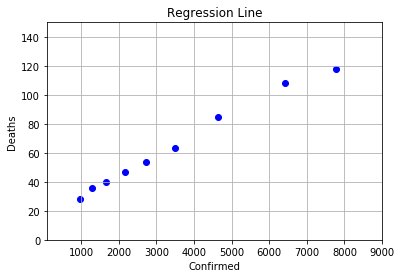

In [38]:
X_pred = result_df[['Infectious']].values
Y_pred = lr.predict(X_pred)
plt.scatter(X_train, Y_train, c='blue')
plt.plot(X_pred, Y_pred, c='red')
plt.title("Regression Line")
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.grid()

plt.xlim([100,9000])
plt.ylim([0,150])

plt.show()

In [39]:
Y_pred_df = pd.DataFrame(Y_pred)
result_df['Estimated Fatalaties'] = Y_pred_df
result_df

,General,Susceptible,Exposed,Infectious,Recovered,Estimated Fatalaties
0,0.000000,3.305106e+08,0.000000e+00,9.590000e+02,0.000000e+00,-8.191395e+02
1,961.777477,3.338316e+08,2.914492e+02,7.341131e+02,4.769513e+02,-8.266661e+02
2,1782.100997,3.371862e+08,3.750221e+02,8.290527e+02,9.418643e+02,-8.234886e+02
3,2481.774981,3.405743e+08,4.531242e+02,9.832511e+02,1.480465e+03,-8.183278e+02
4,3078.544025,3.439965e+08,5.492923e+02,1.180309e+03,2.120096e+03,-8.117325e+02
5,3587.542930,3.474529e+08,6.714880e+02,1.429815e+03,2.888242e+03,-8.033819e+02
6,4021.680542,3.509437e+08,8.281859e+02,1.747605e+03,3.820007e+03,-7.927459e+02
7,4391.967119,3.544693e+08,1.030670e+03,2.155322e+03,4.961456e+03,-7.791001e+02
8,4707.793594,3.580299e+08,1.294342e+03,2.682377e+03,6.373564e+03,-7.614603e+02
9,4977.169714,3.616255e+08,1.640400e+03,3.368996e+03,8.137658e+03,-7.384800e+02
